## EDA

Прочитаем данные:

In [43]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)


df = pd.read_csv('data_save.csv', on_bad_lines='skip')
df.head()

,Объем,Бренд,Цена со скидкой,Цена,Тип вина,Цвет,Сахар,Страна производителя,Регион,Аппелласьон,...,Выдержка в ёмкости,Содержание алкоголя,Количество в упаковке,Температура подачи,Friendly,BiO,Винтаж,Субрегион,Выдержка,Подарочная упаковка
0,0.75,Chateau Pinot,580₽,725₽,Тихое,Красное,Сухое,Россия,Краснодарский край,Кубань. Новороссийск ЗГУ,...,Стальной чан,13%,6,16-18,NaN,NaN,NaN,NaN,NaN,NaN
1,0.75,Bogarve 1915,1 160₽,1 450₽,Тихое,Красное,Сладкое,Испания,NaN,NaN,...,Бочка,15%,6,14-16,NaN,NaN,NaN,NaN,NaN,NaN
2,0.7,Olymp Winery,470₽,470₽,Тихое,Белое,Полусладкое,Россия,Краснодарский край,NaN,...,NaN,10% - 12%,6,10-12,NaN,NaN,NaN,NaN,NaN,NaN
3,0.75,Бурлюк,337₽,421₽,Тихое,Розовое,Полусухое,Россия,Крым,NaN,...,Стальной чан,10.00% - 11%,6,8-10,NaN,NaN,NaN,NaN,NaN,NaN
4,0.75,Felix Solis Avantis,954₽,1 193₽,Тихое,Розовое,Полусухое,Испания,NaN,NaN,...,Стальной чан,13%,6,8-10,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим на размер нашей выборки:

In [44]:
df.shape

(2457, 24)

Проверим на пропуски:

In [45]:
df.isna().sum()

Объем                       0
Бренд                     660
Цена со скидкой             0
Цена                        0
Тип вина                  149
Цвет                        0
Сахар                       0
Страна производителя        0
Регион                    166
Аппелласьон               558
Производитель               5
Категория                 730
Бренд / Серия            1656
Сорт винограда              0
Выдержка в ёмкости        436
Содержание алкоголя       217
Количество в упаковке      93
Температура подачи          0
Friendly                 2283
BiO                      2176
Винтаж                   1309
Субрегион                1533
Выдержка                 2453
Подарочная упаковка      2418
dtype: int64

Видим, что у признаков в конце списка много пропусков и скорее всего от них придется просто избавиться. Посмотрим на их значения:

In [46]:
for col in ['Friendly', 'BiO', 'Выдержка', 'Винтаж', 'Тип вина',
            'Подарочная упаковка', 'Субрегион', 'Бренд / Серия',
            'Категория', 'Выдержка в ёмкости', 'Аппелласьон']:
    print(df[col].value_counts())
    print('-'*60)

Friendly
Sustainable         127
Vegan                39
VeganSustainable      4
Kosher                4
Name: count, dtype: int64
------------------------------------------------------------
BiO
Organic                  142
Biodynamic               111
Natural/raw               24
BiodynamicNatural/raw      4
Name: count, dtype: int64
------------------------------------------------------------
Выдержка
12 месяцев в бочке                                     1
24 месяца в дубе и 12 месяцев в металлических чанах    1
18 месяцев в бочке                                     1
10-15 лет                                              1
Name: count, dtype: int64
------------------------------------------------------------
Винтаж
2022.0    300
2021.0    226
2020.0    178
2019.0     82
2023.0     80
2018.0     75
2017.0     54
2016.0     31
2014.0     24
2013.0     22
2015.0     16
2012.0     10
2011.0     10
2010.0      8
2009.0      8
2007.0      5
2006.0      3
2004.0      3
2005.0      2
2008

Для пропусков у признака "Friendly" можно заполнить условным "NA", так как в данном случае если не указан этот флаг, то за этим и не следили. И так как значений мало, то можно сделать этот признак бинарным, поэтому по итогу будет 1 и 0.

Аналогично с признаком "BiO": сделаем бинарный признак.

По "Выдержке" есть всего лишь 4 строчки, поэтому избивимся от этого признака.

В признаке "Винтаж" есть много годов, где мало значений, их можно объединить в один "< 2011", а пропуски заполнить "NA", считая эти вина невинтажными.

"Подарочная упаковка" будет бинарным признаком.

Практически все вина имеют тип "тихое", поэтому пропуски заполним им же.

По "Субрегиону" мало данных, но в то же время много различных вариантов, поэтому уберем этот признак и будем пользоваться "Страной производства" или "Регионом".

Аналогично уберем "Бренд / Серия".

Пропуски в "Выдержка в ёмкости", "Категория", "Бренд", "Аппелласьон" заполним "unknown".

Признак "Количество в упаковке" ничего не говорит нам, так как не связан с ценой. Как было выяснено с помощью поддержки luding.ru, цена указана за одну единицу товара, поэтому убираем этот признак.

Также уберем строчки, где не указан производитель.

In [47]:
df.loc[~df['Friendly'].isnull(), 'Friendly'] = 1
df.loc[df['Friendly'].isnull(), 'Friendly'] = 0

df.loc[~df['BiO'].isnull(), 'BiO'] = 1
df.loc[df['BiO'].isnull(), 'BiO'] = 0

df.loc[~df['Подарочная упаковка'].isnull(), 'Подарочная упаковка'] = 1
df.loc[df['Подарочная упаковка'].isnull(), 'Подарочная упаковка'] = 0

df.loc[df['Тип вина'].isnull(), 'Тип вина'] = 'Тихое'

df.loc[df['Выдержка в ёмкости'].isnull(), 'Выдержка в ёмкости'] = 'unknown'
df.loc[df['Категория'].isnull(), 'Категория'] = 'unknown'
df.loc[df['Бренд'].isnull(), 'Бренд'] = 'unknown'
df.loc[df['Регион'].isnull(), 'Регион'] = 'unknown'
df.loc[df['Аппелласьон'].isnull(), 'Аппелласьон'] = 'unknown'

df['Винтаж'] = df['Винтаж'].astype('object')
df.loc[(~df['Винтаж'].isnull()), 'Винтаж'] = df.loc[(~df['Винтаж'].isnull()), 'Винтаж'].astype(int).astype(str)
df.loc[df['Винтаж'].isnull(), 'Винтаж'] = 'unknown'
df.loc[(~df['Винтаж'].isnull()) & (df['Винтаж'] < '2011'), 'Винтаж'] = '< 2011'

df.drop(['Выдержка', 'Субрегион', 'Бренд / Серия', 'Количество в упаковке'], axis=1, inplace=True)
df = df.loc[~df['Производитель'].isnull()]

Посмотрим на пропуски еще раз:

In [48]:
df.isna().sum()

Объем                     0
Бренд                     0
Цена со скидкой           0
Цена                      0
Тип вина                  0
Цвет                      0
Сахар                     0
Страна производителя      0
Регион                    0
Аппелласьон               0
Производитель             0
Категория                 0
Сорт винограда            0
Выдержка в ёмкости        0
Содержание алкоголя     217
Температура подачи        0
Friendly                  0
BiO                       0
Винтаж                    0
Подарочная упаковка       0
dtype: int64

Пропуски в содержании алкоголя после преобразования данных к нужному типу и т.п. заполним как среднее от всех остальных.

Посмотрим как распределены категории более наглядно:

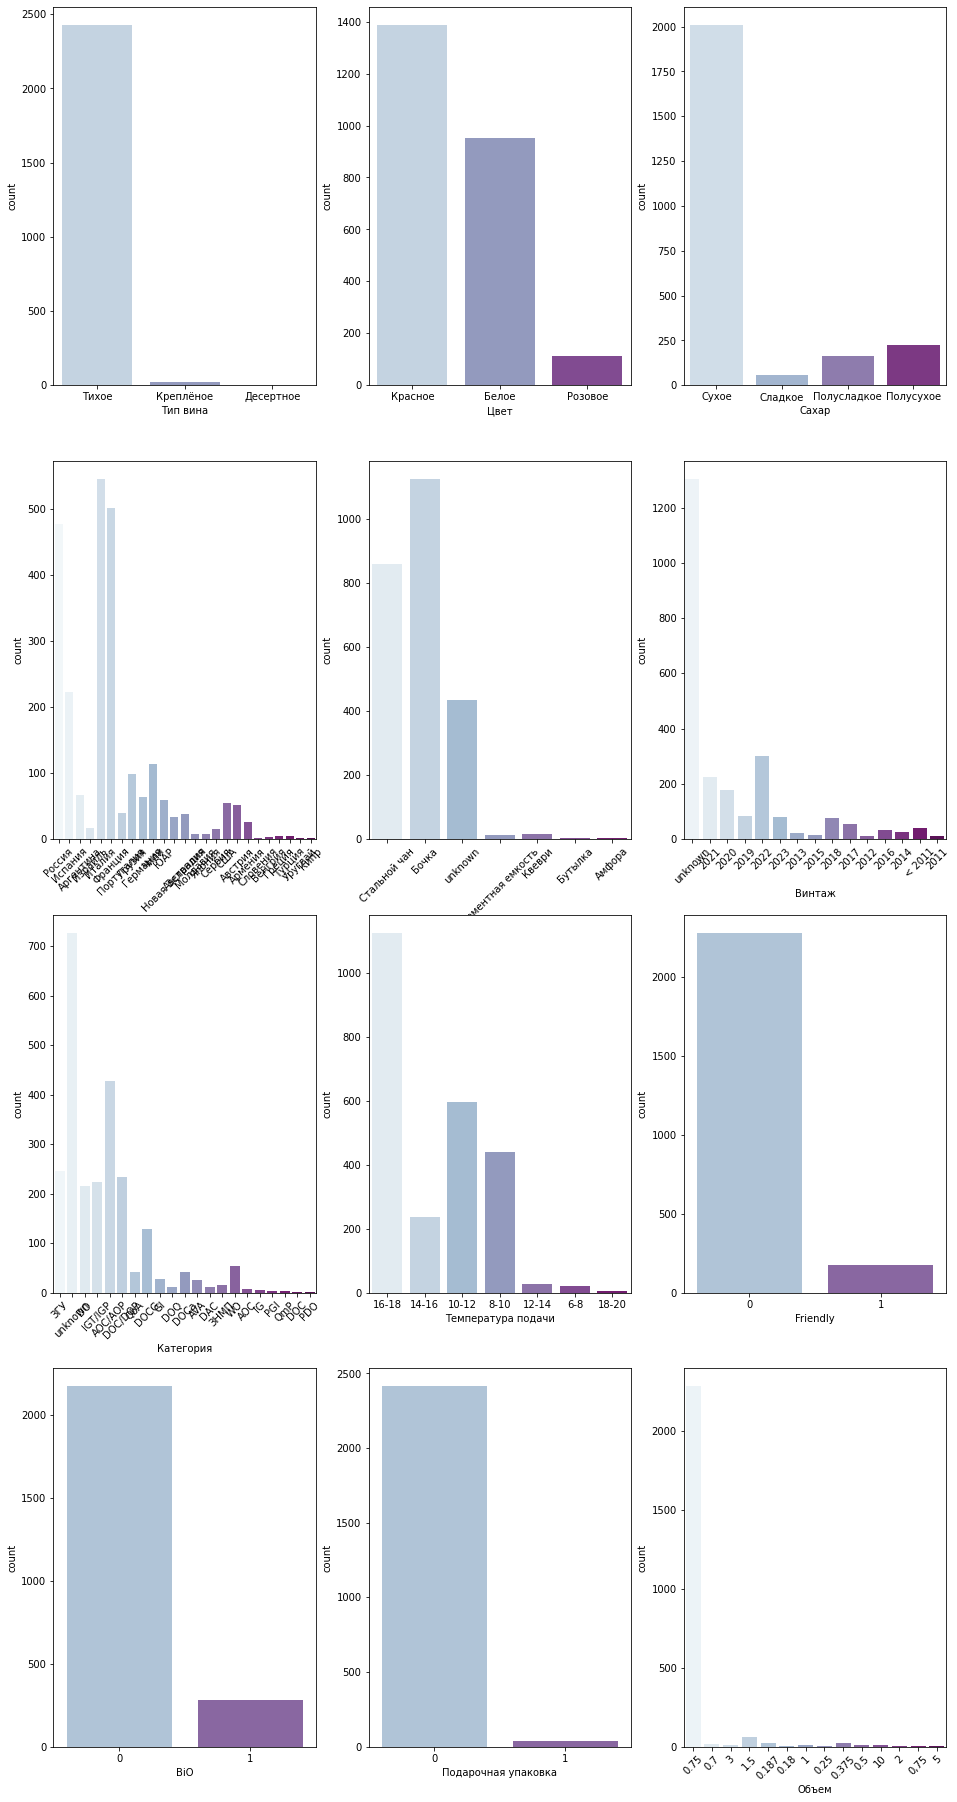

In [49]:
features = df[['Тип вина', 'Цвет', 'Сахар', 'Страна производителя',
               'Выдержка в ёмкости', 'Винтаж', 'Категория',
               'Температура подачи', 'Friendly', 'BiO', 'Подарочная упаковка', 'Объем']]

fig, ax = plt.subplots(4, 3, figsize=(16, 32))

for col, subplots in zip(features, ax.flatten()):
    g = sns.countplot(features, x=col, ax=subplots, palette='BuPu')
    if col in ['Страна производителя', 'Выдержка в ёмкости', 'Винтаж', 'Категория', 'Объем']:
        g.set_xticklabels(g.get_xticklabels(), rotation=45)
    
plt.show()

Теперь обработаем числовые признаки, посмотрим как они выглядят:

In [50]:
df[['Цена', 'Цена со скидкой', 'Содержание алкоголя', 'Температура подачи', 'Объем']].head()

,Цена,Цена со скидкой,Содержание алкоголя,Температура подачи,Объем
0,725₽,580₽,13%,16-18,0.75
1,1 450₽,1 160₽,15%,14-16,0.75
2,470₽,470₽,10% - 12%,10-12,0.7
3,421₽,337₽,10.00% - 11%,8-10,0.75
4,1 193₽,954₽,13%,8-10,0.75


Напишем функции для парсинга признаков. Для температуры подачи и содержания алкоголя будем брать среднее диапазона.

In [51]:
def parse_alco(text):
    matches = re.findall(r'(\d+(\.\d+)?)%', text)
    numbers = [match[0] for match in matches]
    if len(numbers) > 1:
        return (float(numbers[0]) + float(numbers[1])) / 2
    else:
        return float(numbers[0])
    
    
def parse_temp(temp):
    l, r = temp.split('-')
    return (int(l) + int(r)) / 2

In [52]:
df['Объем'] = df['Объем'].str.replace(',', '.').astype('float')

df['Цена со скидкой'] = df['Цена со скидкой'].str.replace('₽', '').str.replace(' ', '').astype('float')
df['Цена'] = df['Цена'].str.replace('₽', '').str.replace(' ', '').astype('float')

df['Содержание алкоголя'] = df['Содержание алкоголя'].apply(lambda x: parse_alco(x) if x is not np.nan else x)
df.loc[df['Содержание алкоголя'].isnull(), 'Содержание алкоголя'] = df['Содержание алкоголя'].mean()

df['Температура подачи'] = df['Температура подачи'].apply(parse_temp)

Убедимся, что теперь нет пропусков в данных:

In [53]:
df.isna().sum().sum()

0

Теперь посмотрим на числовые признаки. Для начала посмотрим на ящик с усами по целевой переменной:

<AxesSubplot:xlabel='Цена'>

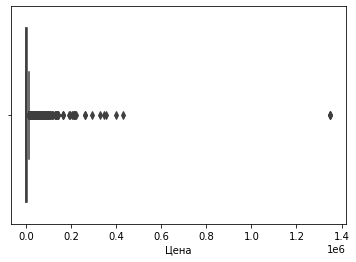

In [54]:
sns.boxplot(x=df['Цена'])

Видим, что есть явные выбросы. Уберем их и посмотрим еще раз:

<AxesSubplot:xlabel='Цена'>

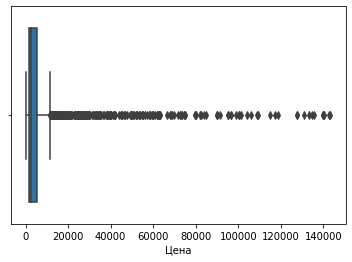

In [55]:
df = df.loc[df['Цена'] < 150000]

sns.boxplot(x=df['Цена'])

Попробуем поиследовать с такими ценами, если что-то пойдет не так, то еще больше урежем по цене.

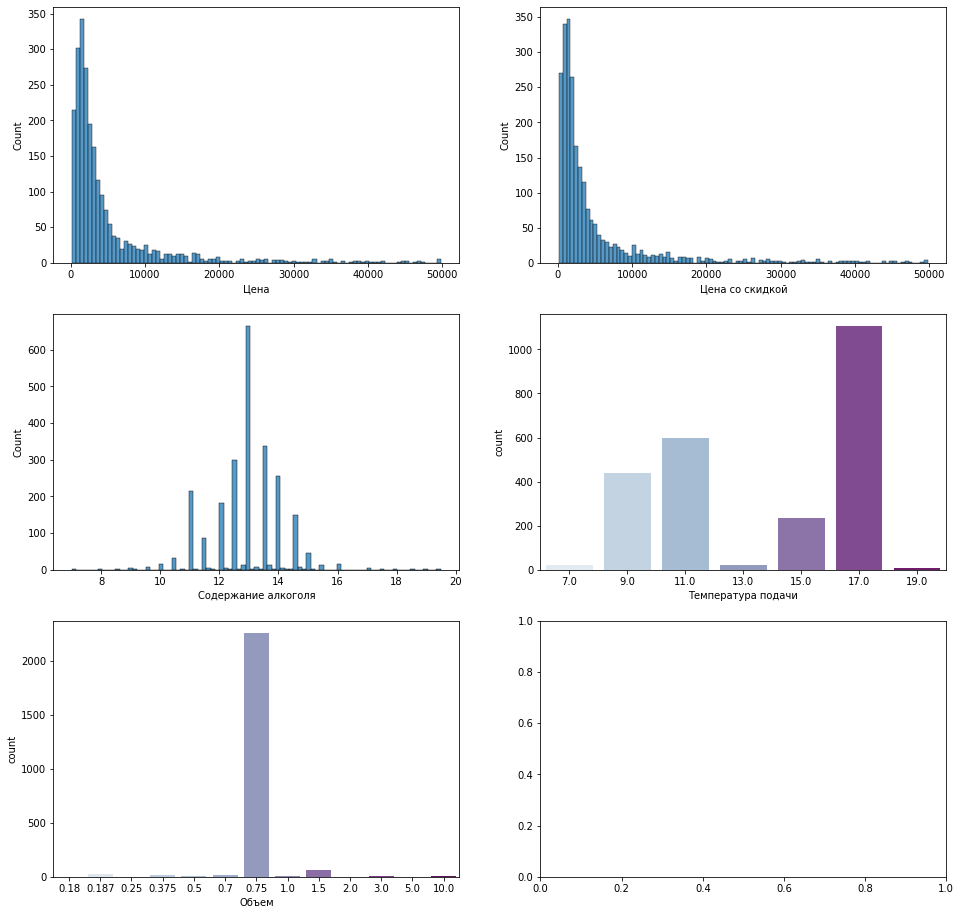

In [56]:
features = df[['Цена', 'Цена со скидкой', 'Содержание алкоголя', 'Температура подачи', 'Объем']]

fig, ax = plt.subplots(3, 2, figsize=(16, 16))

for col, subplots in zip(features, ax.flatten()):
    if col in ['Цена', 'Цена со скидкой', 'Содержание алкоголя']:
        sns.histplot(features.loc[features[col] < 50000], x=col, ax=subplots)
    else:
        g = sns.countplot(features, x=col, ax=subplots, palette='BuPu')
        if col in ['Содержание алкоголя']:
            g.set_xticklabels(g.get_xticklabels(), rotation=45)
        
plt.show()

Посмотрим на корреляционную матрицу:

<AxesSubplot:>

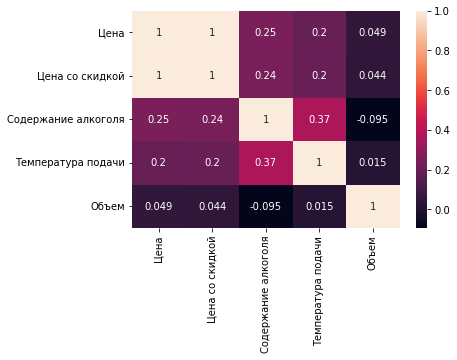

In [57]:
corr = features.corr()
sns.heatmap(corr, annot=True)

Корреляция у цены и цены со скидкой очевидно 1, у содержания алкоголя и температуры есть небольшая корреляция с ценой. А также у них есть корреляция между собой.

Посмотрим на зависимость переменных с таргетом:

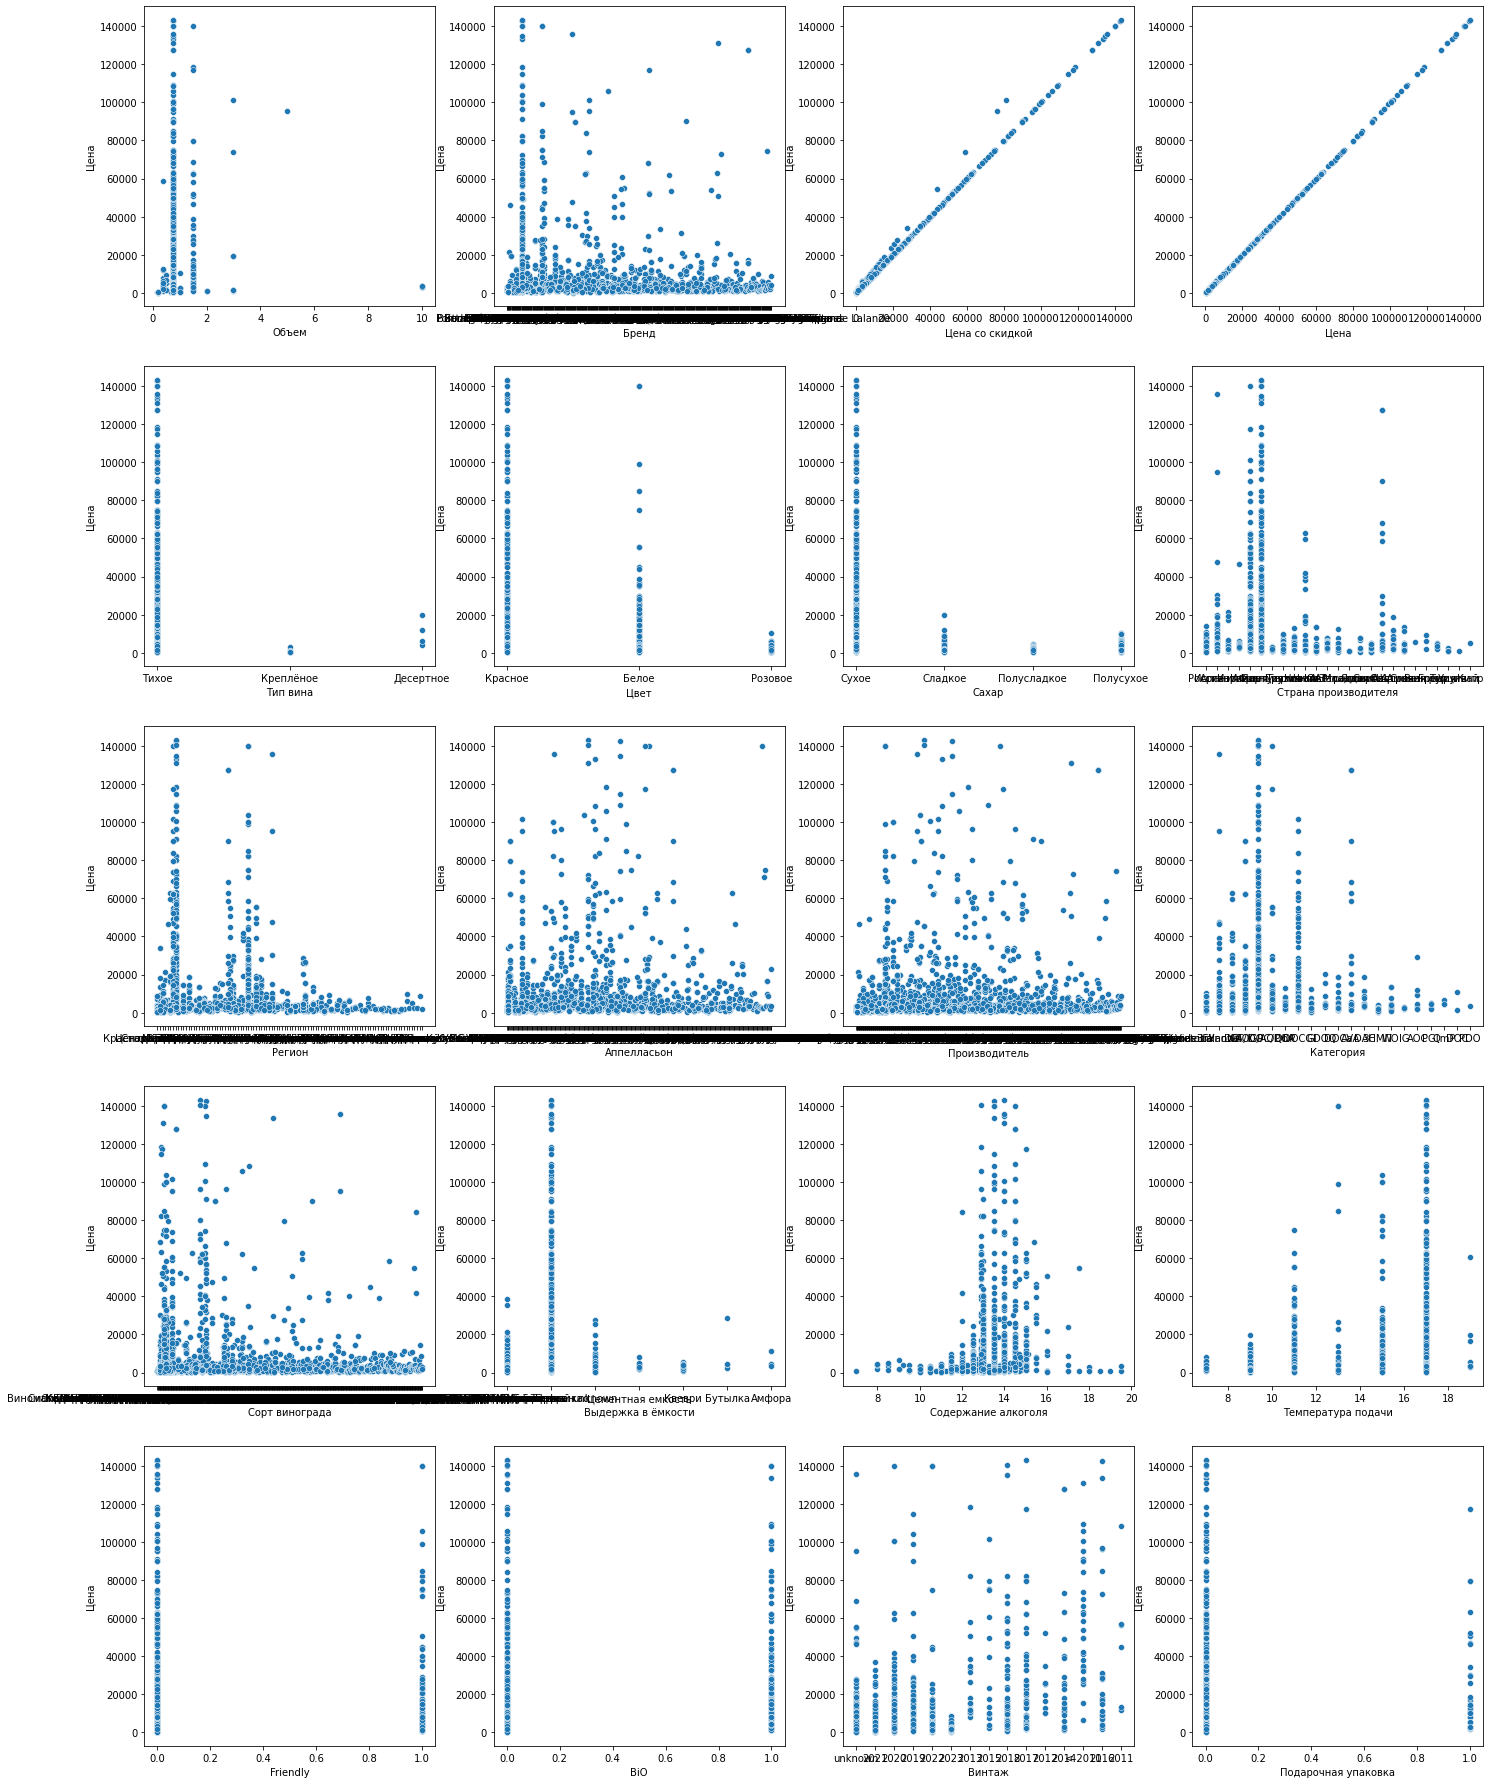

In [58]:
fig, ax = plt.subplots(5, 4, figsize=(24, 32))

for col, subplots in zip(df, ax.flatten()):
    g = sns.scatterplot(df, x=col, y='Цена', ax=subplots)
        
plt.show()

Большинство вин продаются объемом 0.75, поэтому вряд ли можно найти какую-то зависимость.

По брендам видно, что некоторые выделяются, есть вина разного ценового сегмента, в том числе и высокого.

В нашей выборке почти все вина тихие, но видим, что у креплёного и десертного вин нет слишком высоких цен (но возможно так совпало).

По цвету похожая ситуация: в нашей выборке мало розовых вин, и у них наблюдаются меньшая стоимость, чем у красного с белым. Белое вино с значительно высокой ценой встречается реже, чем красное (но опять возможно дело в выборке).

Вина, кроме сухого, по цене не превышают 20000.

Выделяются некоторые страны производителя, у которых есть позиции вин с высокой ценой.

Аналогично с регионом и аппелласьоном, но с последним не так явно.

По производителю сложно сказать.

А вот некоторые категории вин выделяются в плане цен.

По сорту винограда также можно определить у кого возможные высокие цены.

Большинство вин выдерживается в бочках, высокие цены только там, в остальных способах цены ниже.

По содержанию алкоголя можно только сказать, что высокие цены находятся в стандартном диапазоне от 12 до 16, остальные, что ниже или выше градусом, то они уже не такие дорогие.

Температура подачи большинства вин 17 (16-18) градусов.

От Friendly и BiO цена как будто не зависит.

По году винтажа в целом какую-то зависимость можно поймать.

Подарочная упаковка по идее должна лишь добавлять цену.

In [59]:
df.to_csv('dataset.csv', index=False)